#Prof: Prabhát K. Oliveira

#Matéria: Visão Computacional

#Turma: Inteligência Artificial

#Discente 1: Gabriel Sete Ribeiro Lago dos Santos

#Discente 2: Gustavo Oliveira Ramos Cruz

#Discente 3: Moisés Araújo da Paixão

#Discente 4: Yasmin da Silva Bonfim


---

#Detecção e Classificação de Fogo e Fumaça com Redes Neurais

---



In [ ]:
#Importando as bibliotecas necessárias

from IPython.display import clear_output
import matplotlib.pyplot as plt
import timeit
from zipfile import ZipFile
import keras.layers as kl
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
from sklearn.metrics import classification_report
from keras import Sequential
from tensorflow import keras
from keras import layers
from keras.datasets import cifar10, mnist
from keras.models import Model
from collections import Counter
from keras.backend import clear_session
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pathlib import Path

In [ ]:
#Extraindo o Dataset
file = '/content/Wildfire_and_Smoke.7z'  

!pip install patool
!pip  install pyunpack
from pyunpack import Archive
Archive(file).extractall("/content") 

In [ ]:
#Carregando o Array do X e y
X = np.load('/content/Wildfire_and_Smoke/X_wildfire.npy')
y = np.load('/content/Wildfire_and_Smoke/y_wildfire.npy')

In [ ]:
#Reshape no X para a entrada do modelo
X = X.reshape((X.shape[0], 64,64,3))
X.shape

(15000, 64, 64, 3)

In [ ]:
#Divisão dos dados 
data = train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y)
X_train, X_test, y_train, y_test = data

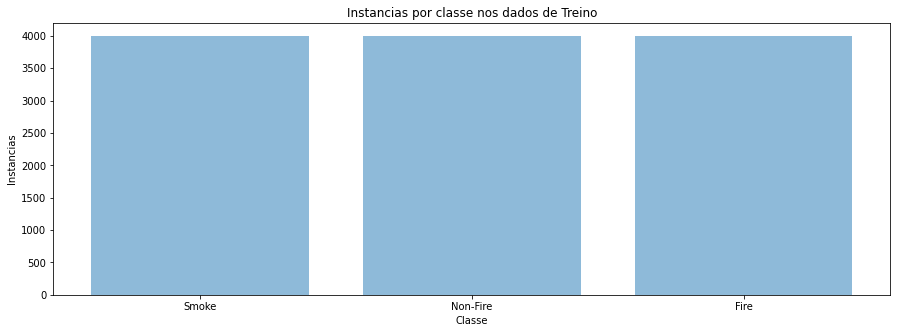

In [ ]:
# Gráfico de instâncias por classe nos dados de Treino
plt.figure(figsize=(15,5))
plt.ylabel('Instancias')
plt.xlabel('Classe')
plt.title('Instancias por classe nos dados de Treino')
bars = ('Smoke', 'Non-Fire', 'Fire')
x_pos = np.arange(len(bars))
plt.bar(x_pos, Counter(y_train).values(), align='center', alpha=0.5)
plt.xticks(x_pos, bars)
plt.show()

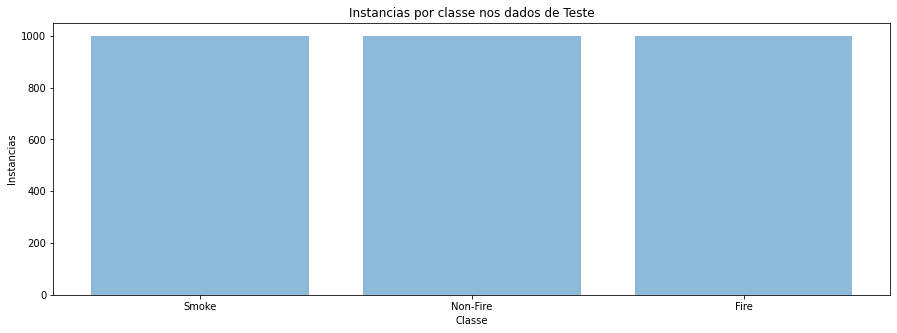

In [ ]:
# Gráfico de instâncias por classe nos dados de Teste
plt.figure(figsize=(15,5))
plt.ylabel('Instancias')
plt.xlabel('Classe')
plt.title('Instancias por classe nos dados de Teste')
bars = ('Smoke', 'Non-Fire', 'Fire')
x_pos = np.arange(len(bars))
plt.bar(x_pos, Counter(y_test).values(), align='center', alpha=0.5)
plt.xticks(x_pos, bars)
plt.show()

In [ ]:
#Reescalonando os dados 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
#Passando para to_categorical

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

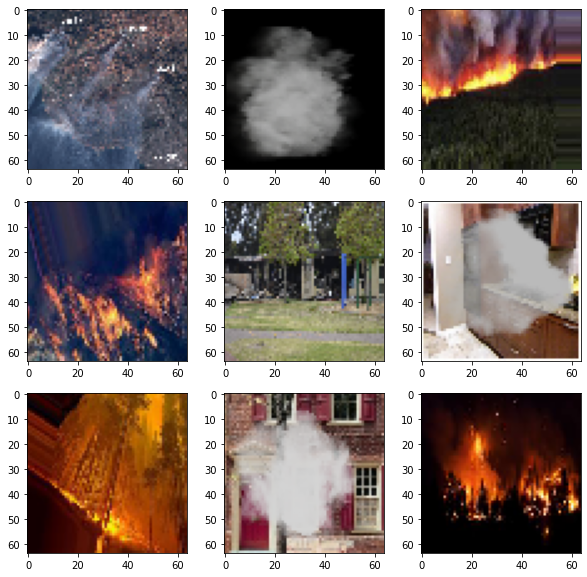

In [ ]:
#Plotando algumas imagens dos dados de treino

plt.figure(figsize=(10,10))
for i in range(0,9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
#Modelo CNN com Separable Conv

inputs = keras.Input(shape=(64,64,3))
x = inputs

x = layers.SeparableConv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2,2))(x)
x = layers.SeparableConv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

x = layers.SeparableConv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.SeparableConv2D(64, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

x = layers.SeparableConv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.SeparableConv2D(128, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
out = layers.Dense(3, activation='softmax')(x)

model = keras.Model(inputs, out, name='Model')

In [ ]:
#Summary do modelo
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 separable_conv2d (Separable  (None, 64, 64, 32)       155       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 32, 32, 32)       1344      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                         

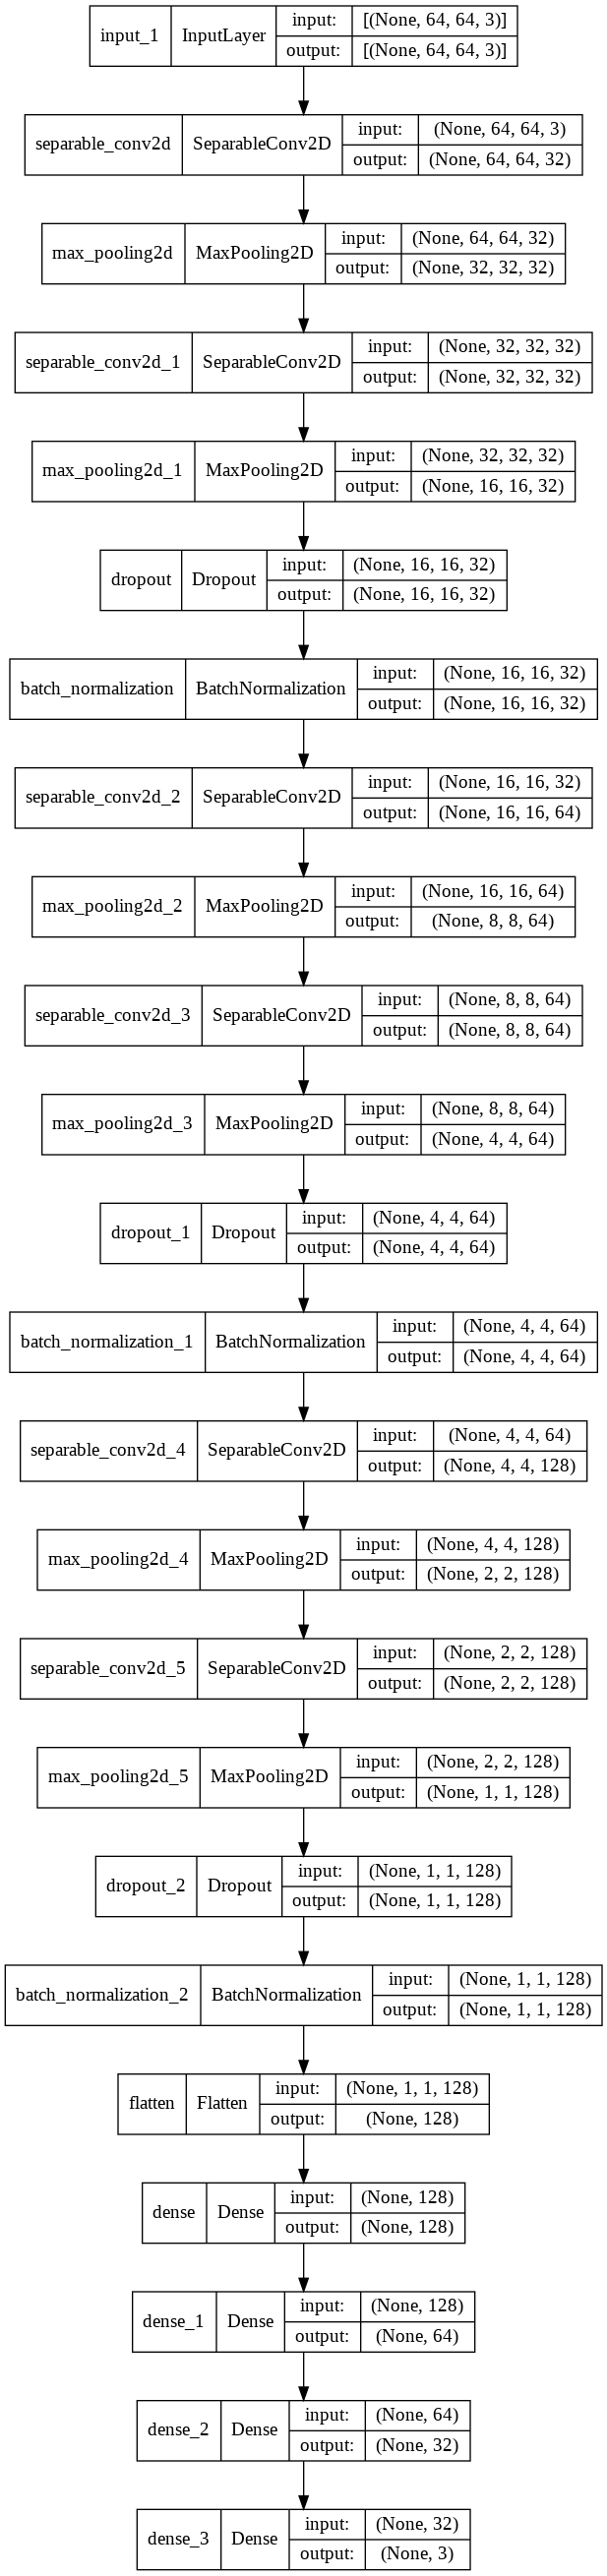

In [ ]:
#Mostrando o modelo em plot
plot_model(model, show_shapes=True)

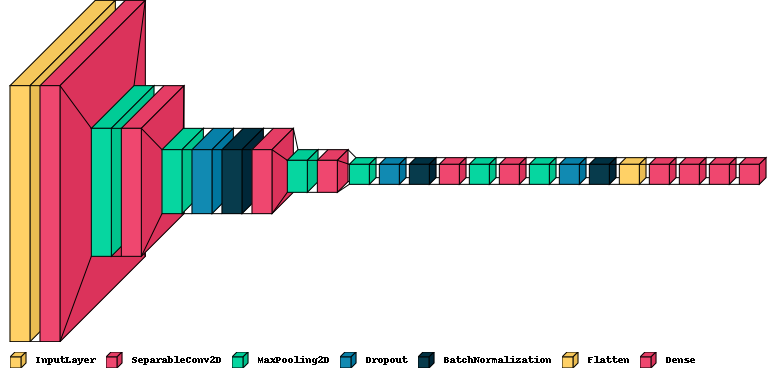

In [ ]:
#Visualizando o modelo com outra perspectiva
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
#Limpando o Backend
tf.keras.backend.clear_session()

In [ ]:
#Compilando o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='SGD', 
              metrics=['accuracy'])

In [ ]:
#Treinamento
hist = model.fit(X_train, y_train,
                 epochs = 100,
                 batch_size = 40,
                 validation_split=0.20,
                 verbose=1,
                 callbacks=[keras.callbacks.ReduceLROnPlateau()])

Epoch 1/100
240/240 [==============================] - 10s 31ms/step - loss: 1.0294 - accuracy: 0.5016 - val_loss: 1.0975 - val_accuracy: 0.3429 - lr: 0.0100
Epoch 2/100
240/240 [==============================] - 7s 29ms/step - loss: 0.6952 - accuracy: 0.7257 - val_loss: 1.0023 - val_accuracy: 0.6233 - lr: 0.0100
Epoch 3/100
240/240 [==============================] - 7s 29ms/step - loss: 0.4850 - accuracy: 0.8092 - val_loss: 0.6935 - val_accuracy: 0.7063 - lr: 0.0100
Epoch 4/100
240/240 [==============================] - 7s 29ms/step - loss: 0.4129 - accuracy: 0.8365 - val_loss: 0.4573 - val_accuracy: 0.7975 - lr: 0.0100
Epoch 5/100
240/240 [==============================] - 7s 29ms/step - loss: 0.3650 - accuracy: 0.8576 - val_loss: 0.8897 - val_accuracy: 0.6317 - lr: 0.0100
Epoch 6/100
240/240 [==============================] - 7s 29ms/step - loss: 0.3141 - accuracy: 0.8732 - val_loss: 0.3912 - val_accuracy: 0.8400 - lr: 0.0100
Epoch 7/100
240/240 [==============================] - 7s

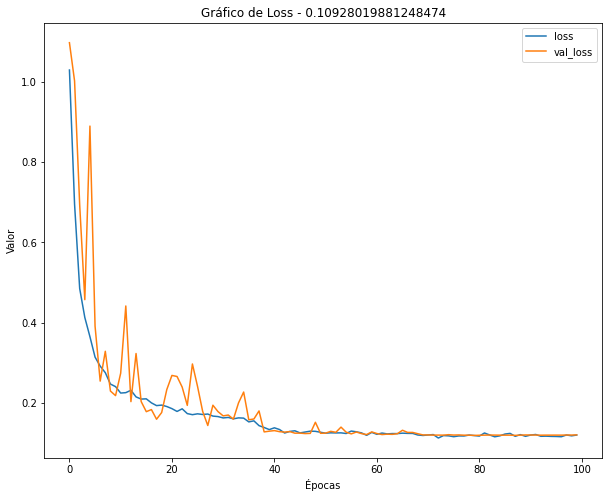

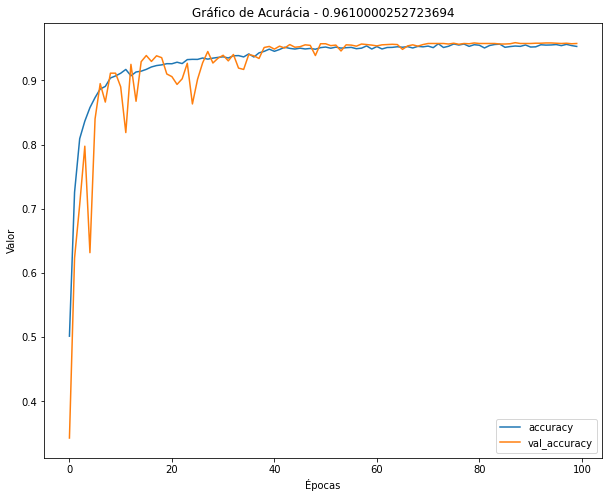

In [ ]:
# Evaluate do modelo
scores = model.evaluate(X_test, y_test, verbose=0)

# Gráfico de loss
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Loss - {scores[0]}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

# Gráfico de acurácia
plt.figure(figsize=(10,8))
plt.title(f"Gráfico de Acurácia - {scores[1]}")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
#Predict do modelo
pred = model.predict(X_test)
pred = np.round(pred)

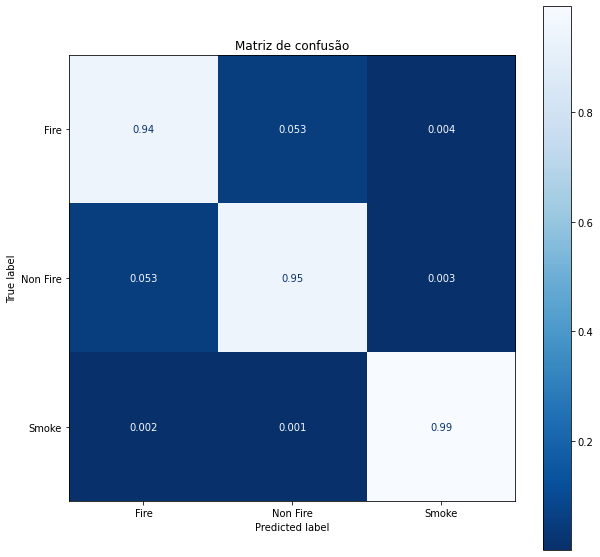

In [ ]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1), normalize='pred')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Fire', 'Non Fire', 'Smoke'])
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Matriz de confusão')
cmd.plot(ax = ax,cmap='Blues_r')

In [ ]:
#Outras métricas
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1), digits=4, target_names=['Fire', 'Non Fire', 'Smoke']))

              precision    recall  f1-score   support

        Fire     0.9449    0.9430    0.9439      1000
    Non Fire     0.9459    0.9440    0.9449      1000
       Smoke     0.9930    0.9970    0.9950      1000

    accuracy                         0.9613      3000
   macro avg     0.9613    0.9613    0.9613      3000
weighted avg     0.9613    0.9613    0.9613      3000



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


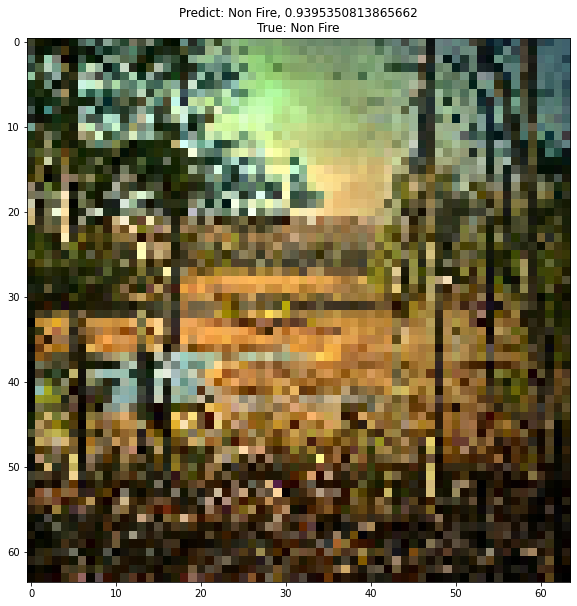

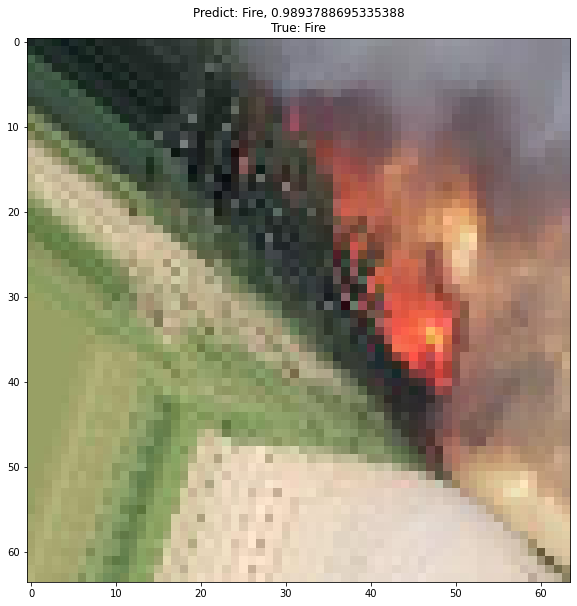

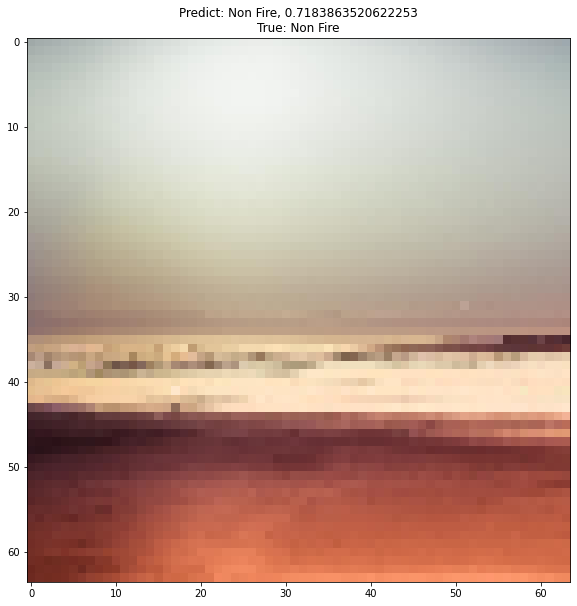

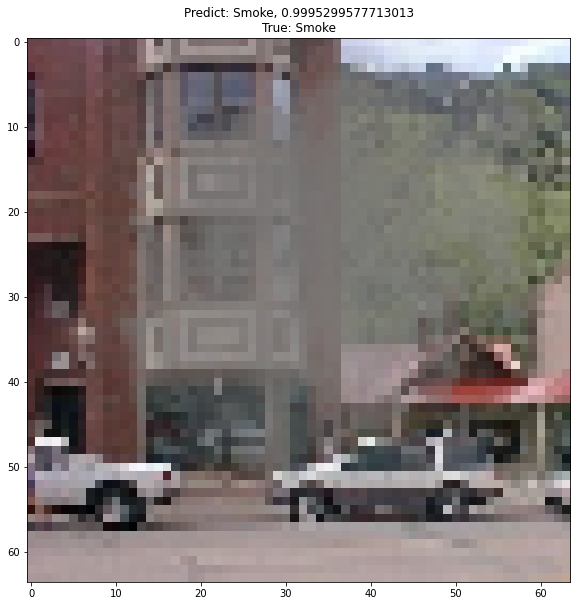

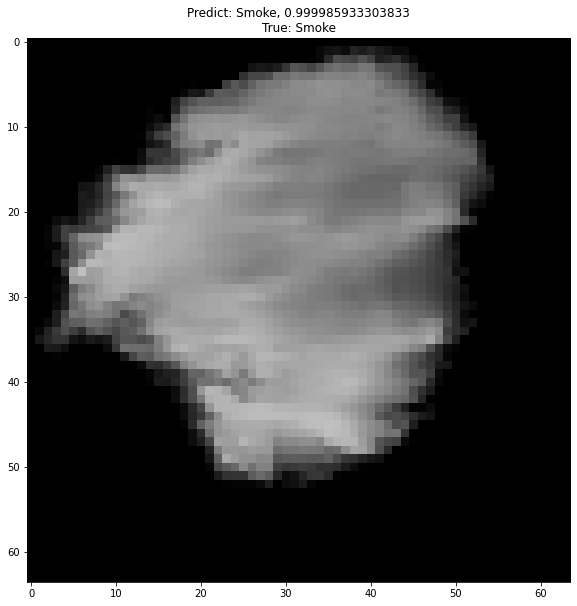

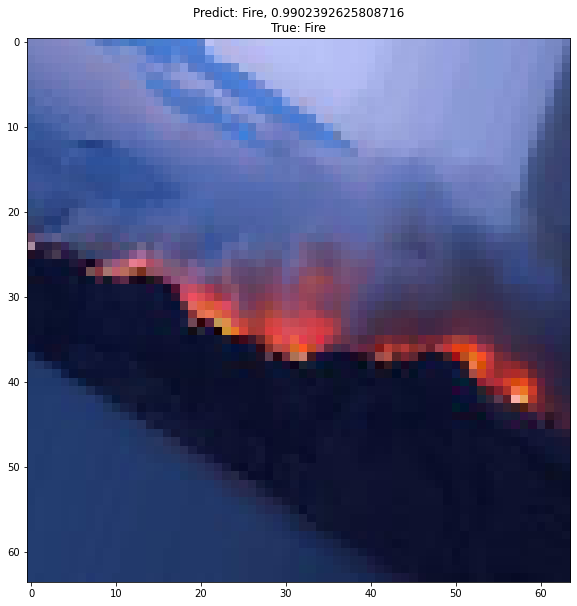

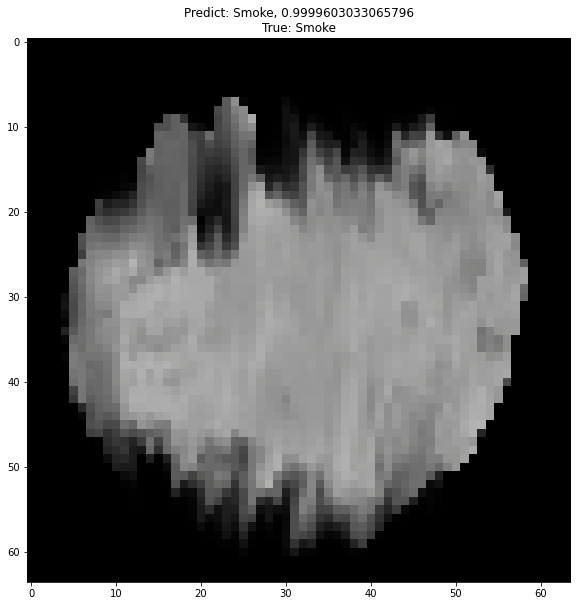

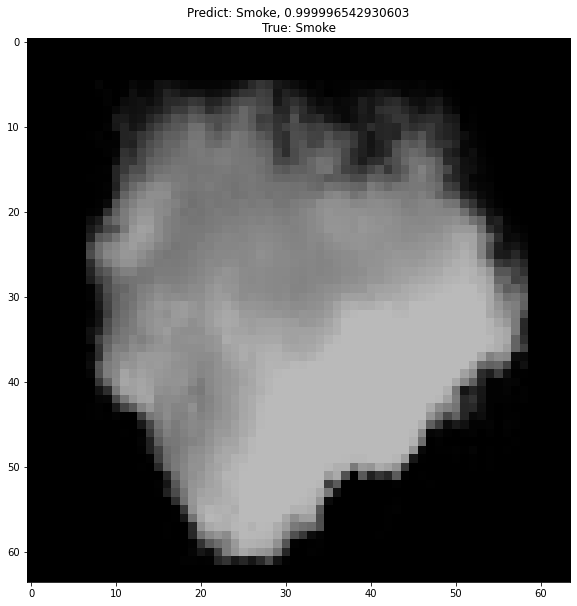

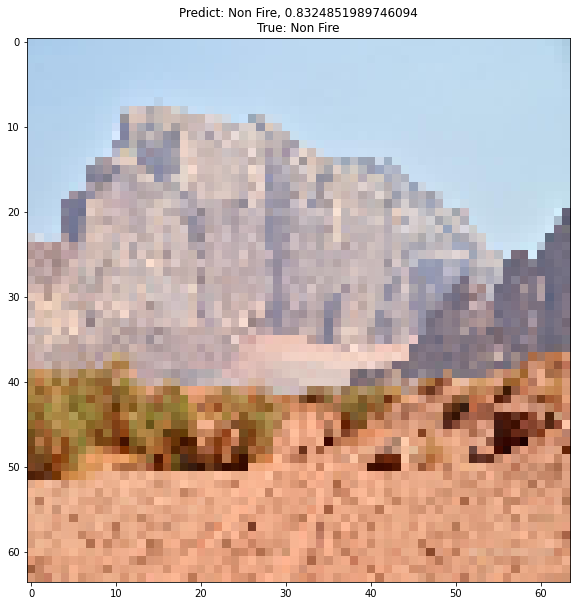

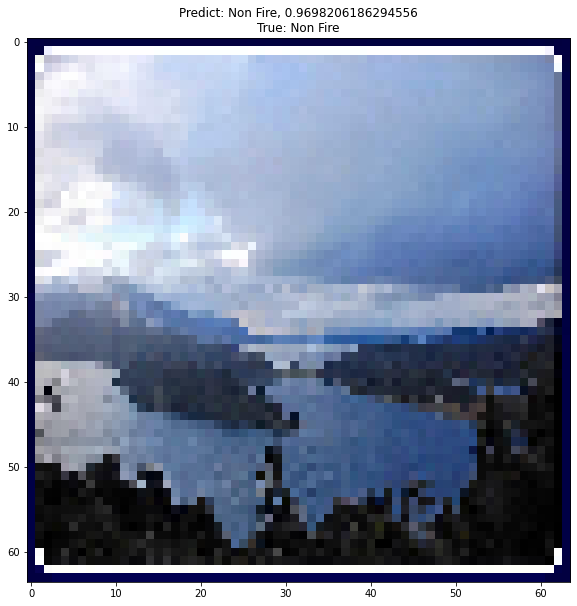

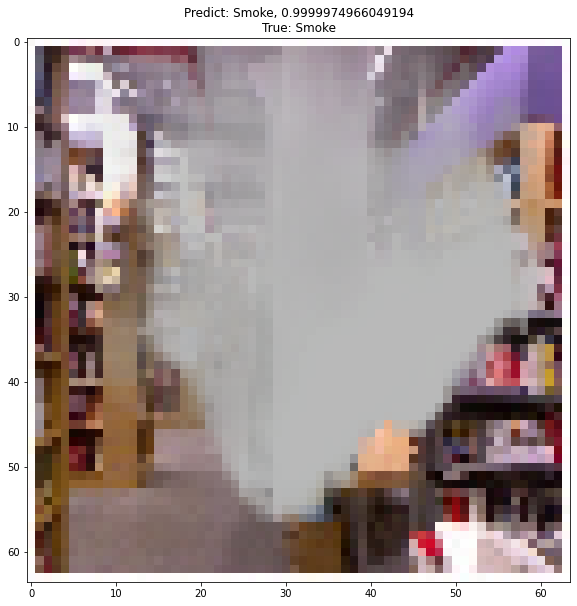

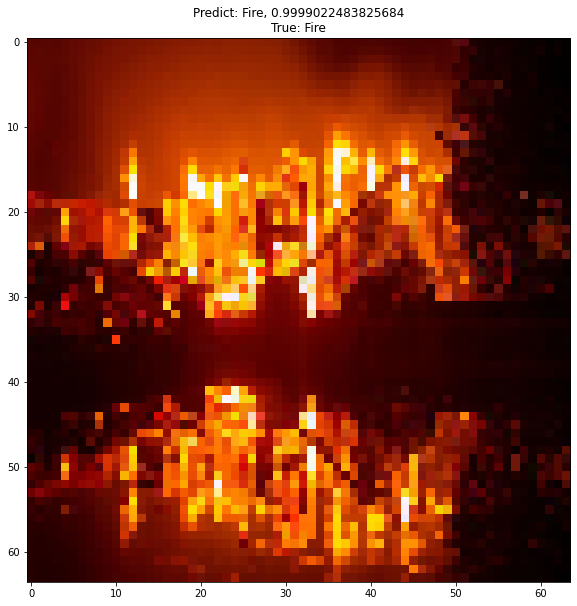

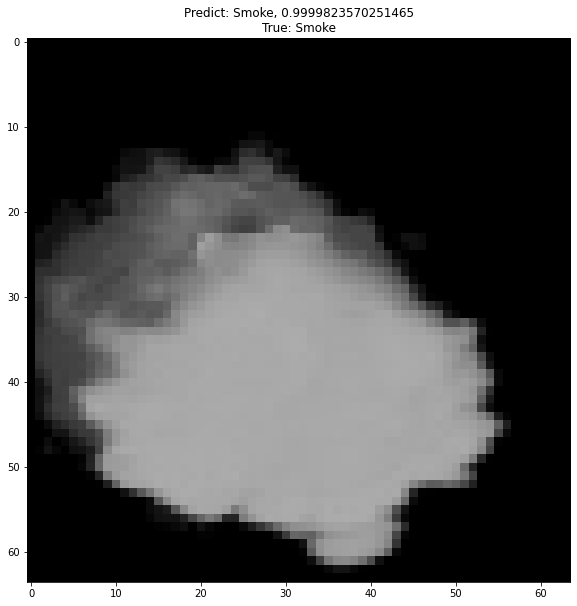

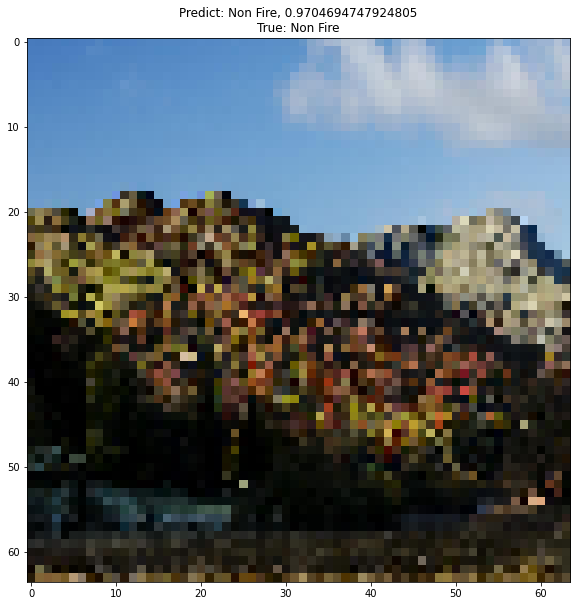

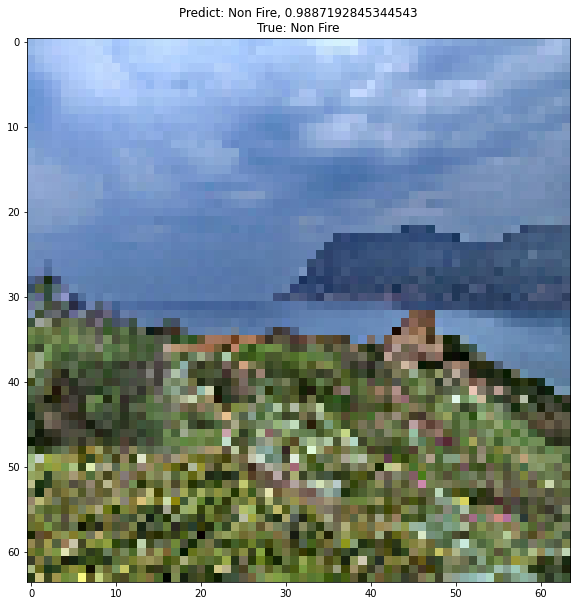

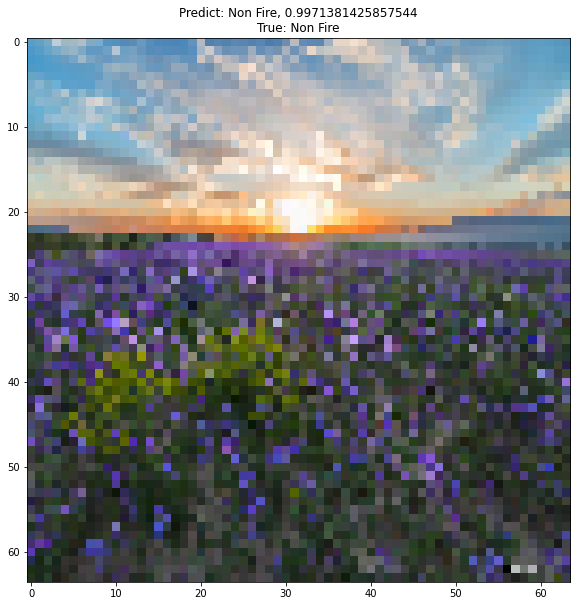

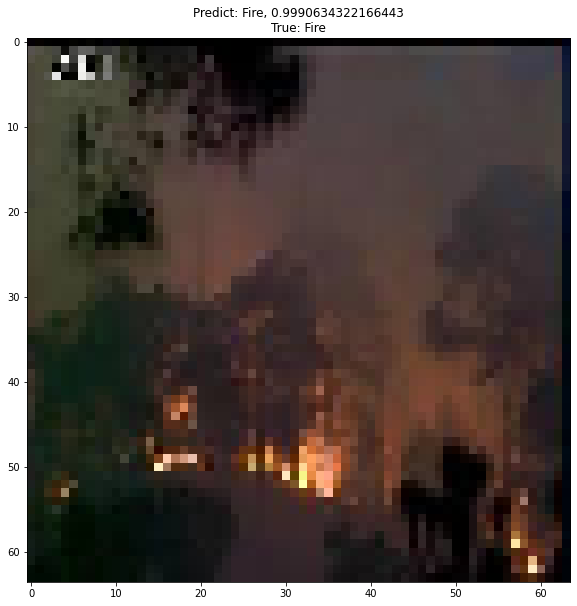

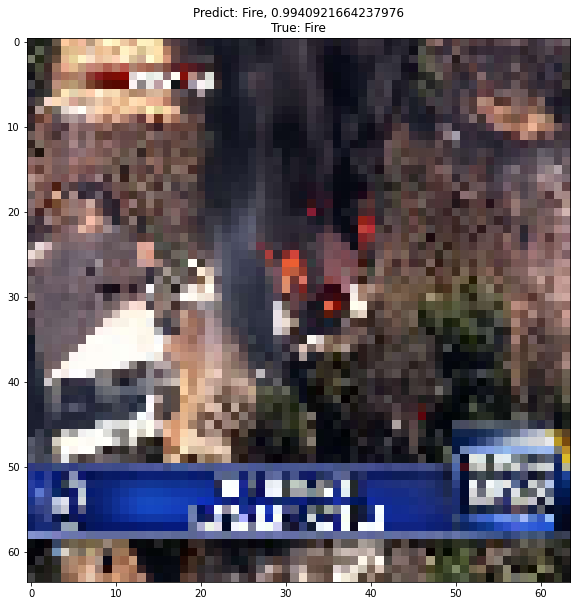

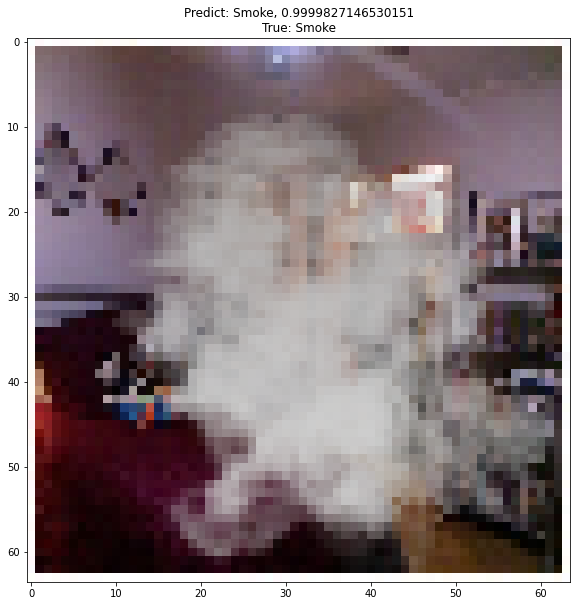

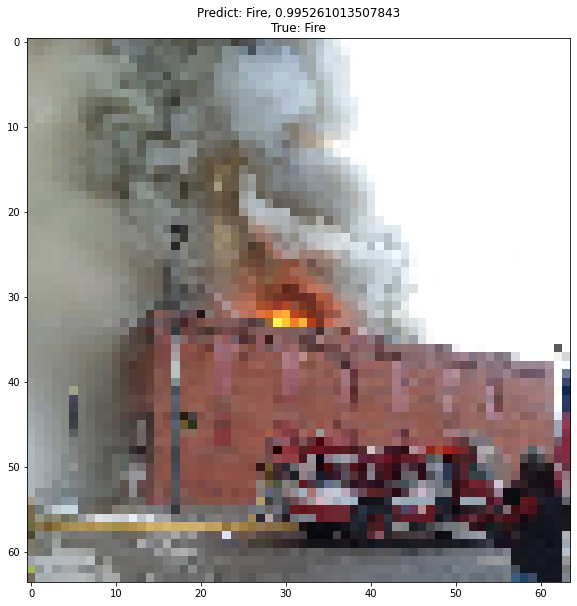

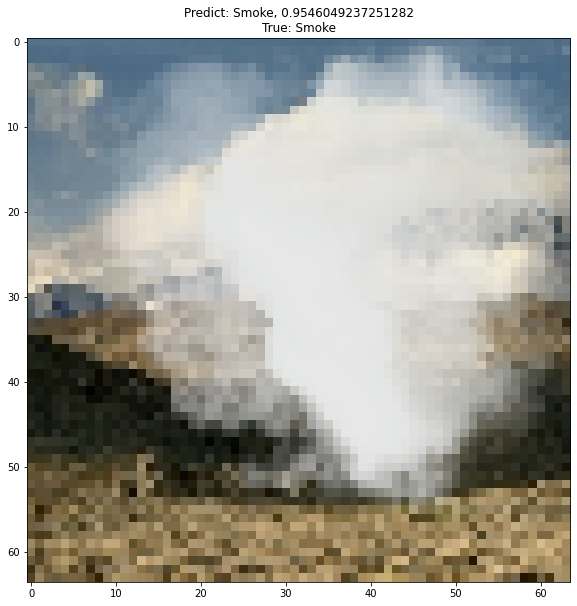

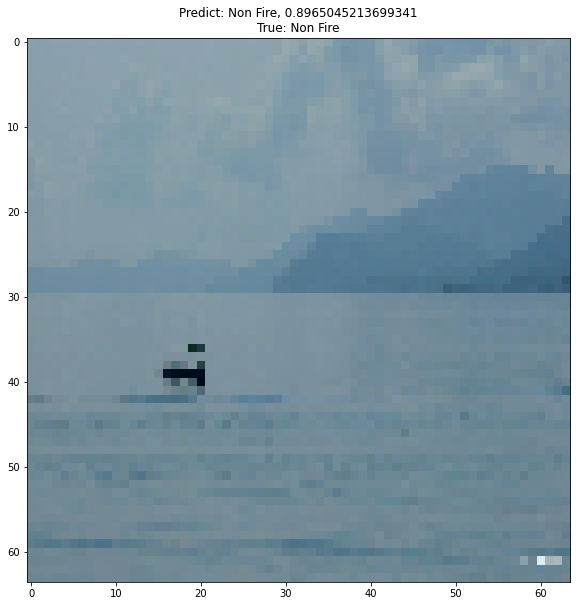

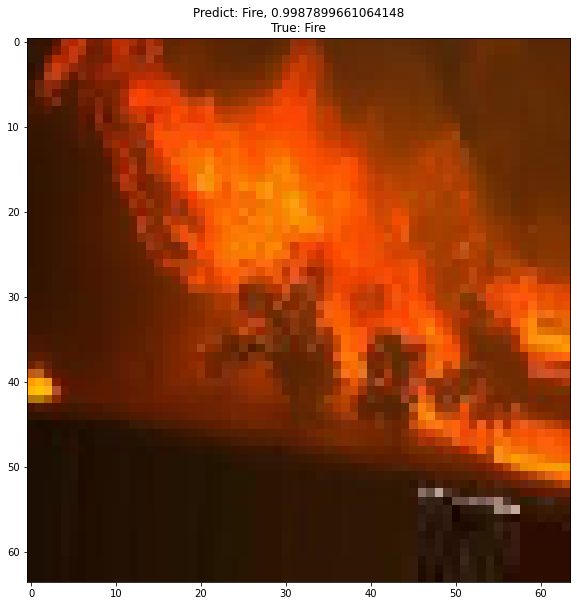

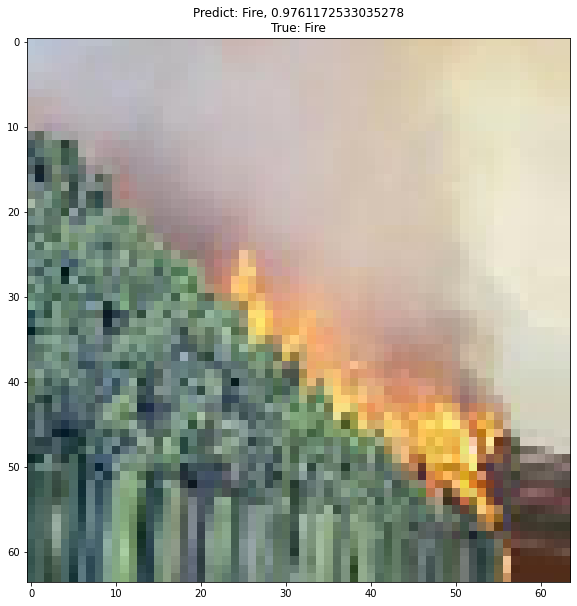

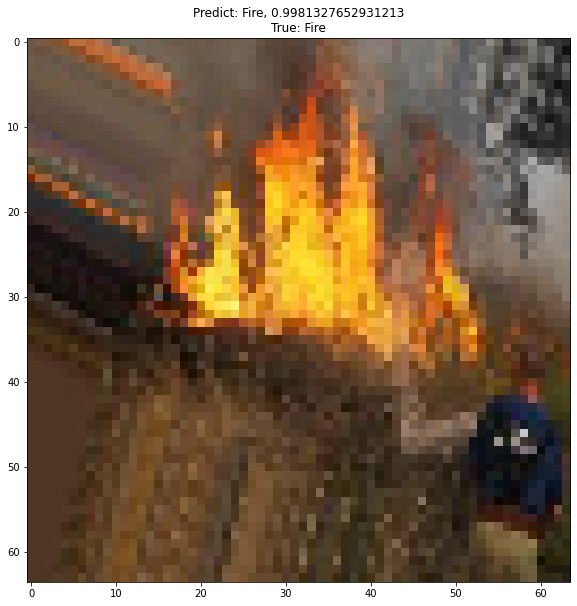

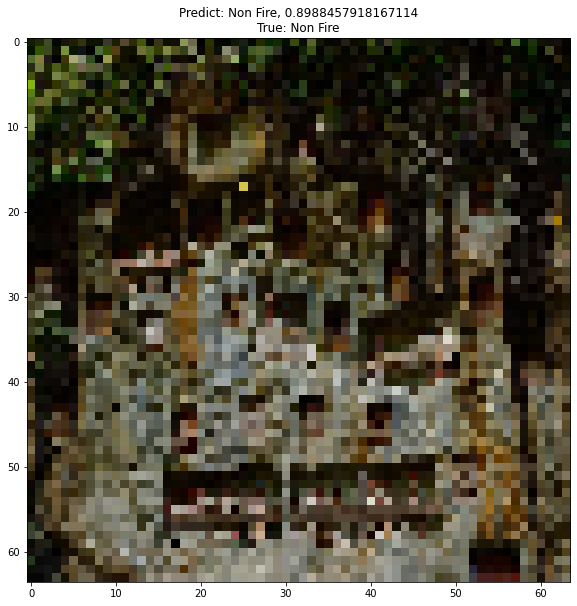

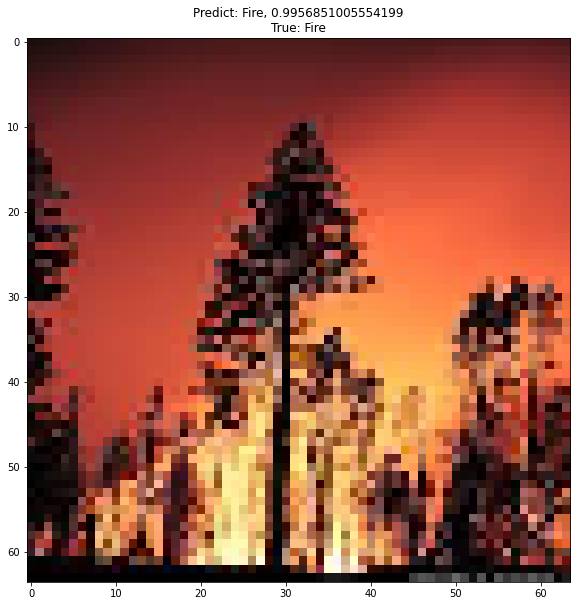

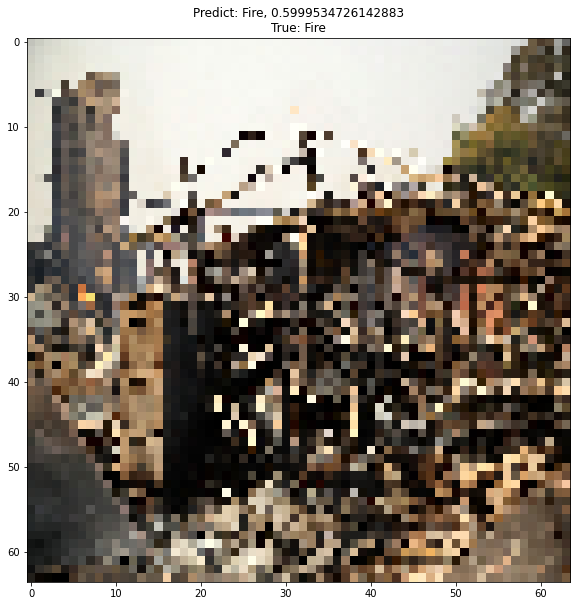

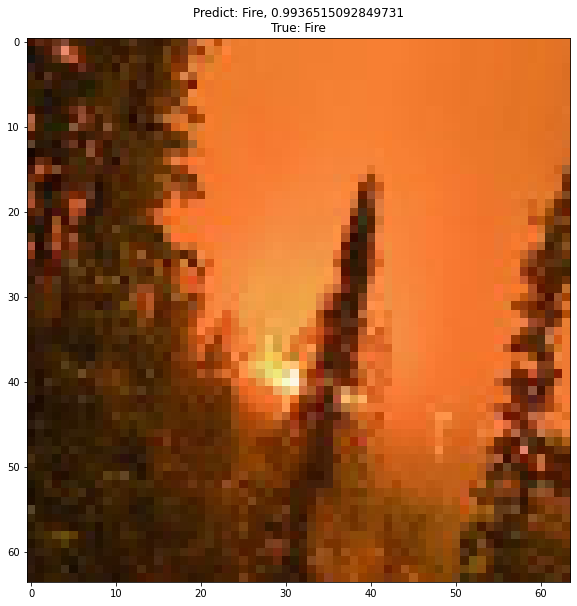

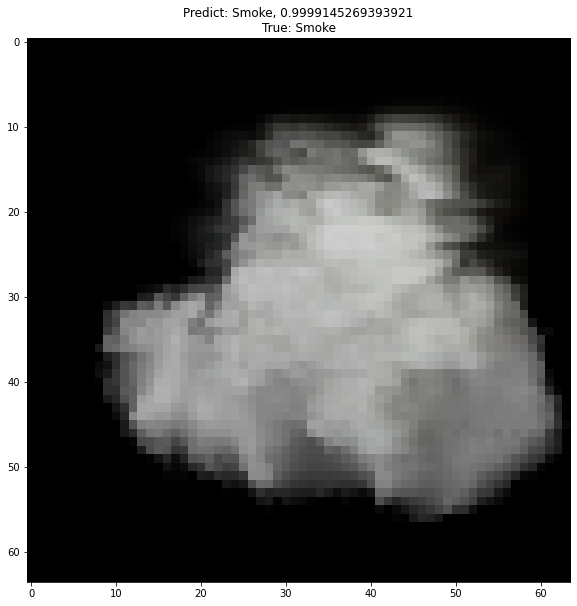

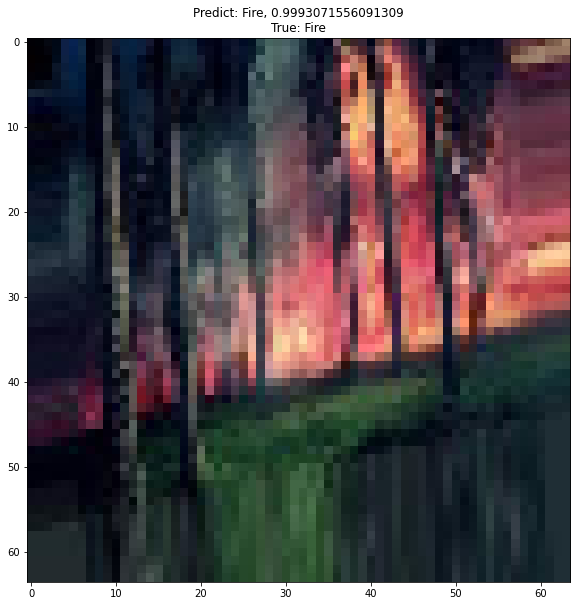

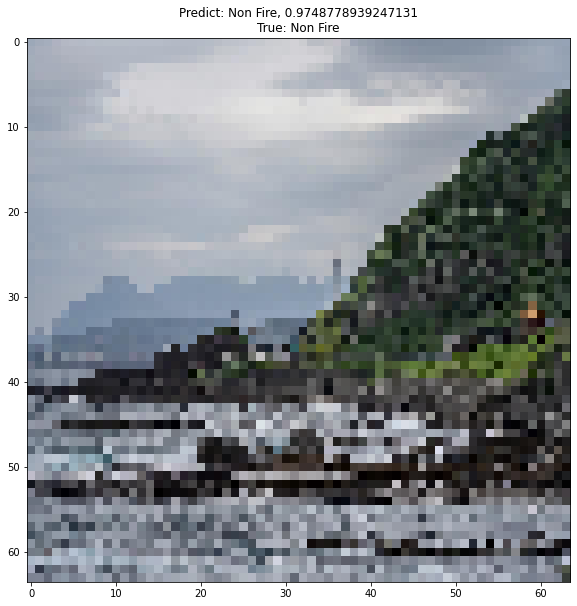

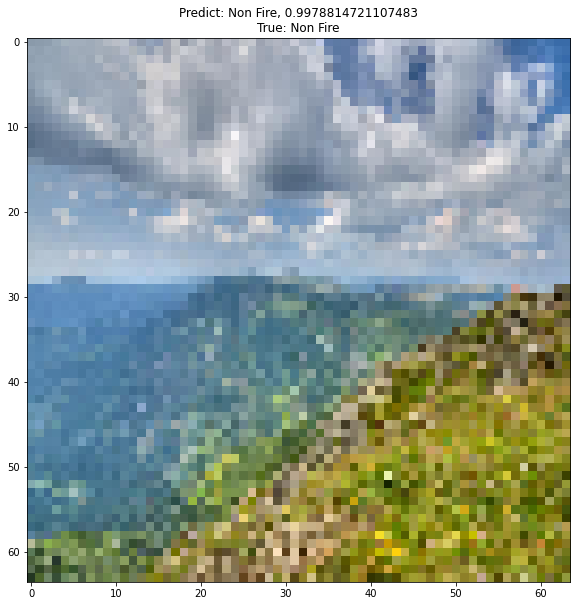

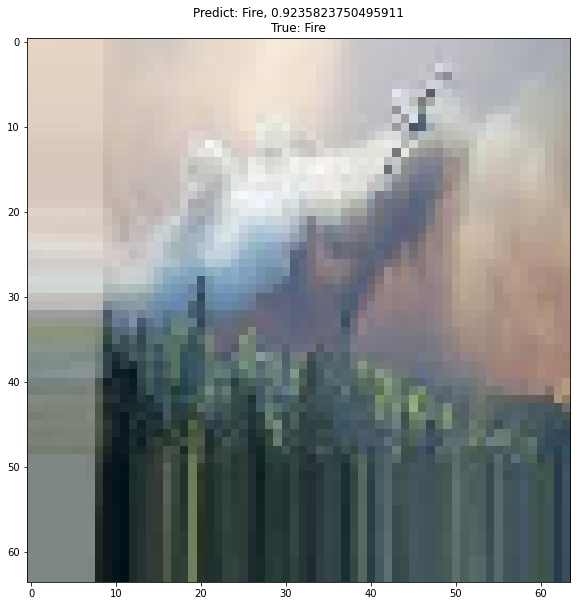

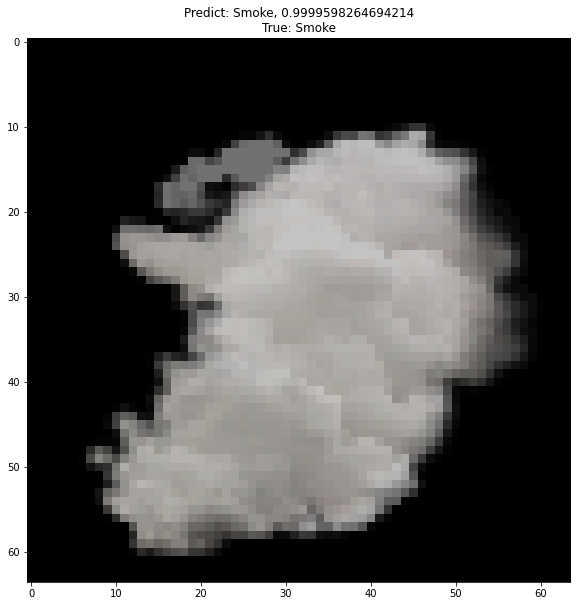

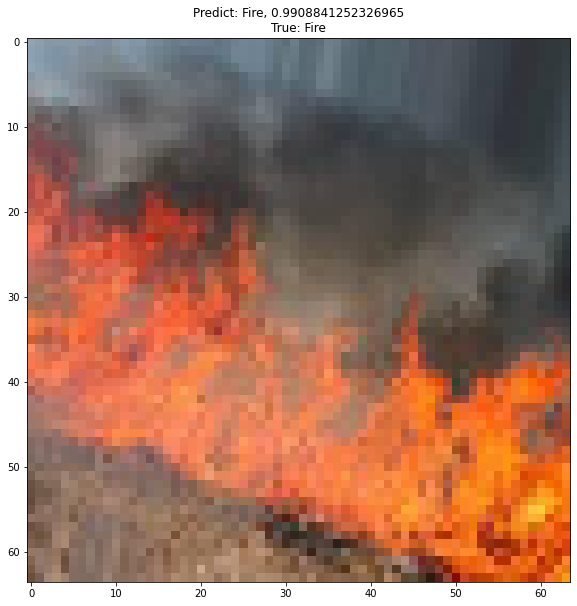

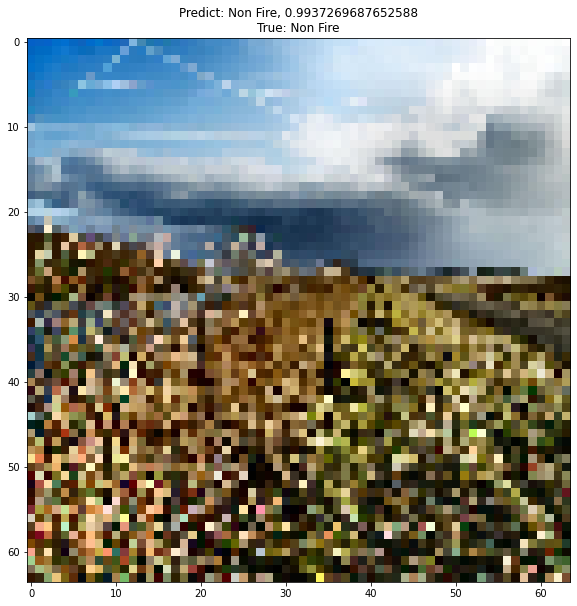

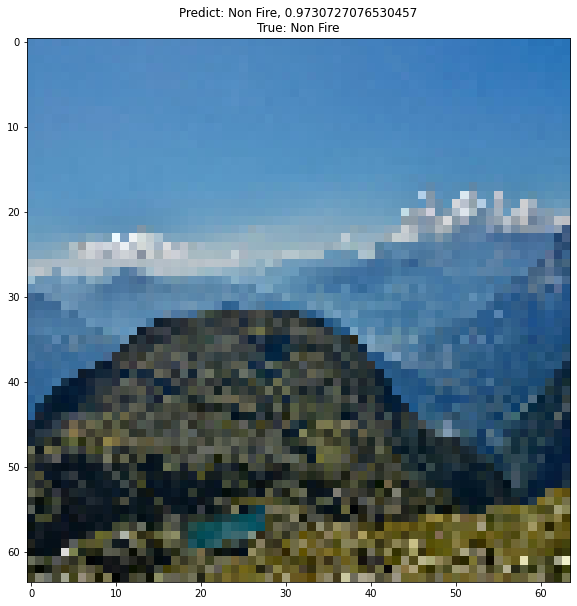

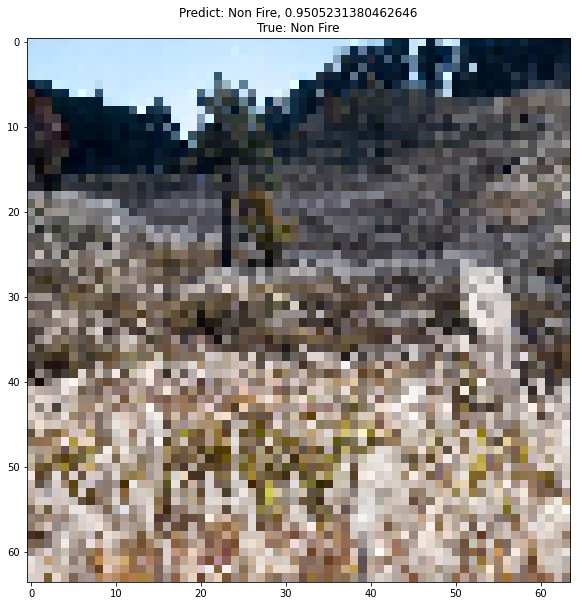

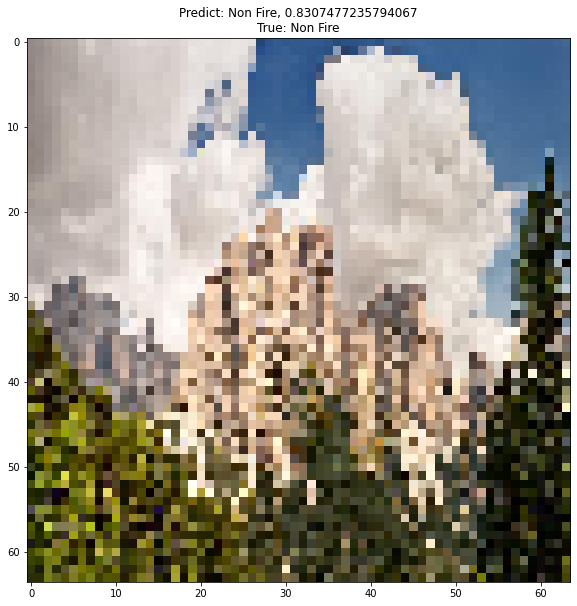

In [ ]:
#Plotando o predict e a classificação do modelo

wildfire = ['Fire', 'Non Fire', 'Smoke']

for i in range(0,40):
  ax = plt.subplots(figsize=(10,10))
  p = model.predict(X_test)[i]
  idmax = np.argmax(p)
  plt.imshow(X_test[i])
  plt.title(f'Predict: {wildfire[idmax]}, {p[idmax]}\nTrue: {wildfire[y_test.argmax(axis=1)[i]]}')

plt.show()

In [ ]:
#Salvando o modelo
model.save('FSDN-Model.h5')